# Import, inspect & convert data

## Import dependencies

In [1]:
# Import dependecies
import json
import pandas as pd
import numpy as np
import re

## Declare file directory

In [2]:
file_dir = 'untracked/'

## Kaggle CSVs

### Import & convert

In [3]:
# Import Kaggle data as DataFrames
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

### Inspect

In [4]:
# Inspect Kaggle metadata
kaggle_metadata.sample(n=20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33440,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://laslashermovie.com/,323792,tt2735292,en,L.A. Slasher,Incensed by the tabloid culture which celebrat...,...,2015-06-12,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death to Reality TV,L.A. Slasher,False,3.7,10.0
23890,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,244610,tt2503154,en,The Den,A young woman studying the habits of webcam ch...,...,2013-12-12,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Online is the scene of the #crime,The Den,False,6.2,123.0
309,False,"{'id': 144200, 'name': 'Swan Princess Series',...",35000000,"[{'id': 16, 'name': 'Animation'}]",http://www.sonypictures.com/movies/theswanprin...,22586,tt0111333,en,The Swan Princess,The beautiful princess Odette is transformed i...,...,1994-11-18,9771658.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An enchanting classic destined to capture your...,The Swan Princess,False,6.5,251.0
19069,False,"{'id': 386410, 'name': 'Dragon Ball Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",NaN,116776,tt0142248,ja,Doragon Bōru: Makafushigi Dai-Bōken,Master Roshi has succeeded at the one mission ...,...,1988-07-09,0.0,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Dragon Ball: Mystical Adventure,False,6.4,30.0
43806,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,416127,tt3921348,en,Dark Exorcism,A skeptical grad student and a renowned parano...,...,2015-10-15,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dark Exorcism,False,4.4,5.0
19306,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,38034,tt0124836,zh,女警察,Incriminating evidence against a gang is left ...,...,1973-04-26,0.0,84.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,The Heroine,False,4.4,9.0
26573,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10769, '...",NaN,54148,tt0377834,es,Días de fútbol,A comedic romp that celebrates the power of fr...,...,2003-09-19,12212123.0,113.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,NaN,Soccer Days,False,6.2,15.0
14255,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",NaN,99189,tt0081746,en,Werner Herzog Eats His Shoe,Having lost a bet with documentarian Errol Mor...,...,1980-12-01,0.0,20.0,[],Released,NaN,Werner Herzog Eats His Shoe,False,7.1,16.0
10541,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,28212,tt0105750,fr,La vie de bohème,Three penniless artists become friends in mode...,...,1992-02-18,0.0,100.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,La Vie de Bohème,False,7.4,26.0
22903,False,NaN,2000000,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,85444,tt1407052,es,Arrugas,Based on Paco Roca's comic of the same title (...,...,2011-09-19,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Wrinkles,False,6.3,24.0


In [5]:
# Inspect ratings
ratings.sample(n=20)

,userId,movieId,rating,timestamp
17470651,181284,73,3.0,846050025
24980160,259749,5505,4.0,1150757941
10264050,105950,1193,5.0,992148897
13049451,135606,51080,3.0,1265472377
14834734,154272,109607,3.0,1448164579
14407405,149729,543,3.0,837711648
5422826,55884,8636,2.0,1247969486
2296270,23865,58559,5.0,1418383524
25677639,267251,59995,4.5,1296010182
23485945,243715,39446,0.5,1281736199


## Wikipedia JSON

### Import

In [6]:
# Import Wikipedia JSON file as dictionary
file_dir='untracked/'
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

### Inspect

In [7]:
# Inspect dictionary
len(wiki_movies_raw)

7311

In [8]:
# Inspect first 5 rows of dictionary
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [9]:
# Inspect last 5 rows of dictionary
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [10]:
# Inspect some records in middle of dictionary
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

### Convert

In [11]:
# (1/2) Convert Wikipedia data to DataFrame and take a look to see
# (2/2) how much cleaning needs to be done
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Print list of all columns in Wikipedia DataFrame
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [13]:
# Count number of columns 
len(wiki_movies_df.columns)

193

# Clean Wikipedia data

## Filter out TV shows

In [14]:
# Filter data
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [15]:
# Filter data (cont.)
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

## Consolidate alternative titles

In [16]:
# Create a function to clean movie data
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

In [17]:
# See which movies have a value for "Arabic"
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [18]:
# Step 1: Make an empty dict to hold all of the alternative titles
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

In [19]:
# Step 2: Loop through a list of all alternative title keys.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        return movie

In [20]:
# Step 2a: Check if the current key exists in the movie object.
# Step 2b: If so, remove the key-value pair and add to
# the alternative titles dictionary.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:                 #Step 2a
            alt_titles[key] = movie[key] #Step 2b
            movie.pop(key)
    return movie

In [21]:
# Step 3: After looping through every key,
# add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    return movie

In [22]:
# make a list of cleaned movies with a list comprehension
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [23]:
# Set wiki_movies_df to be the DataFrame created from clean_movies
# and print out a sorted list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Delete redundant columns

In [24]:
# Define function
def clean_movie(movie):
    
    # Create non-destructive copy
    movie = dict(movie) #create a non-destructive copy
    
    # Combine alternative titles into one list
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # Merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    # Return function
    return movie

In [25]:
# rerun list comprehension to clean wiki_movies
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# recreate wiki_movies_df
wiki_movies_df = pd.DataFrame(clean_movies)

# print sorted list of columns
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Delete rows with duplicate IMDB IDs

In [26]:
# Create new column to store IMDB IDs
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

# Print length of dataframe prior to dropping rows
print(len(wiki_movies_df))

# Drop rows with duplicate IMDB IDs
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)

# Print length of dataframe prior to dropping rows
print(len(wiki_movies_df))

# Inspect transformed DataFrame
wiki_movies_df.sample(n=10)

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
6487,https://en.wikipedia.org/wiki/I_Saw_the_Light_...,2016,https://www.imdb.com/title/tt1490785/,I Saw the Light,"[Hank Williams: The Biography, by Colin Escott...","[Tom Hiddleston, Elizabeth Olsen, Cherry Jones...",NaN,Dante Spinotti,"[September 11, 2015, (, 2015-09-11, ), (, TIFF...",123 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1490785
3384,https://en.wikipedia.org/wiki/Paper_Soldiers,2003,https://www.imdb.com/title/tt0309986/,Paper Soldiers,NaN,"[Beanie Sigel, Kevin Hart, Stacey Dash, Michae...",NaN,NaN,"[June 2002, (, 2002-06, )]",88 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0309986
2590,https://en.wikipedia.org/wiki/Beautiful_(2000_...,2000,https://www.imdb.com/title/tt0210567/,Beautiful,NaN,"[Minnie Driver, Joey Lauren Adams, Leslie Stef...",NaN,Robert D. Yeoman,"[September 29, 2000, (, 2000-09-29, )]",112 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0210567
7031,https://en.wikipedia.org/wiki/Suspiria_(2018_f...,2018,https://www.imdb.com/title/tt1034415/,Suspiria,"[Suspiria, by, Dario Argento, Daria Nicolodi]","[Dakota Johnson, Tilda Swinton, Mia Goth, Ange...",NaN,Sayombhu Mukdeeprom,"[September 1, 2018, (, 2018-09-01, ), (, Venic...",153 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1034415
3525,https://en.wikipedia.org/wiki/Friday_Night_Lig...,2004,https://www.imdb.com/title/tt0390022/,Friday Night Lights,"[Friday Night Lights: A Town, a Team, and a Dr...","[Billy Bob Thornton, Derek Luke, Jay Hernandez...",NaN,Tobias Schliessler,"[October 8, 2004, (, 2004-10-08, )]",118 min.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0390022
147,https://en.wikipedia.org/wiki/Mermaids_(1990_f...,1990,https://www.imdb.com/title/tt0100140/,Mermaids,"[Mermaids, by, Patty Dann]","[Cher, Bob Hoskins, Winona Ryder, Michael Scho...",NaN,Howard Atherton,"[December 14, 1990, (, 1990-12-14, )]",110 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0100140
4631,https://en.wikipedia.org/wiki/The_Dark_Knight_...,2008,https://www.imdb.com/title/tt0468569/,The Dark Knight,[Characters appearing in comic books published...,"[Christian Bale, Michael Caine, Heath Ledger, ...",NaN,Wally Pfister,"[July 14, 2008, (, 2008-07-14, ), (New York Ci...",152 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0468569
691,https://en.wikipedia.org/wiki/Blood_In_Blood_Out,1993,https://www.imdb.com/title/tt0106469/,Blood In Blood Out,NaN,"[Jesse Borrego, Benjamin Bratt, Enrique Castil...",NaN,Gabriel Beristain,"[April 16, 1993, (, 1993-04-16, )]","[180 minutes, [1], 190 minutes, (, Director's ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0106469
5531,https://en.wikipedia.org/wiki/Contraband_(2012...,2012,https://www.imdb.com/title/tt1524137/,Contraband,"[Reykjavík-Rotterdam, written by, Arnaldur Ind...","[Mark Wahlberg, Kate Beckinsale, Ben Foster, G...",NaN,Barry Ackroyd,"[January 13, 2012, (, 2012-01-13, )]",110 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt1524137
5437,https://en.wikipedia.org/wiki/28_Hotel_Rooms,2012,https://www.imdb.com/title/tt2124074/,28 Hotel Rooms,NaN,"[Chris Messina, Marin Ireland]",NaN,Doug Emmett,"[November 9, 2012, (, 2012-11-09, )]",82 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt2124074


In [27]:
# Use list comprehension to see how many null values in each column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

## Remove columns with over 90% null values

In [28]:
# Use list comprehension to see which columns are less than 90% null values
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [29]:
# Create list of columns to keep
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

# Keep only selected columns
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

# Print number of remaining columns
len(wiki_movies_df.columns)

21

## Reformat columns

In [30]:
# Inspect column datatypes
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

### Box office data

In [31]:
# Create data series that drops missing values from column
box_office = wiki_movies_df['Box office'].dropna()

In [32]:
# Count remaining rows
len(box_office)

5485

In [33]:
# Calculate what percentage of data was dropped
(len(wiki_movies_df['Box office']) - len(box_office))/len(wiki_movies_df['Box office'])

0.22010521825678941

In [34]:
# Inspect box office data (before formatting)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [35]:
# Use lambda function to convert column data to string
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [36]:
# Use lambda function to convert column lists into string
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [37]:
# Inspect box office data (after formatting)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [38]:
# Create form to match data in format "$123.4 million/billion"
    # Step 1: Start with a dollar sign.
    # Step 2: Add an arbitrary (but non-zero) number of digits.
    # Step 3: Add an optional decimal point.
    # Step 4: Add an arbitrary (but possibly zero) number of more digits.
    # Step 5: Add a space (maybe more than one).
    # Step 6: Add the word "million" or "billion."
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [39]:
# Create form to match data in format ""$123,456,789"
    # Step 1: Start with a dollar sign.
    # Step 2: Add a group of one to three digits.
    # Step 2: Add a group of one to three digits.
form_two = r'\$\d{1,3}(?:,\d{3})+'

# Count up the total number that return True
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [40]:
# Create Boolean Series to select box office values
# that don't match Form One
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)

# Create Boolean Series to select box office values
# that don't match Form Two
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

# See which entries do not fit either form
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [41]:
# Pattern match problems
    # Some values have spaces in between the dollar sign and the number.
    # Some values use a period as a thousands separator, not a comma.
    # Some values are given as a range.
    # "Million" is sometimes misspelled as "millon."

# Fixes to Form Two
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# Replacing ranges with upper value
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

# Fixes to Form One
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [42]:
# Define function to parse values in budget column into desired format
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [43]:
# Extract values from box_office, apply parse_dollars function
# and create new column in Wiki DataFrame
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [44]:
# Inspect new box_office column in Wiki DataFrame
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [45]:
# Drop "Box office" column (which is now redundant)
wiki_movies_df.drop('Box office', axis=1, inplace=True)

### Budget data

In [46]:
# Create budget variable, dropping empty rows
budget = wiki_movies_df['Budget'].dropna()

In [47]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [48]:
# Replace budget ranges with upper value
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [49]:
# Apply formats to budget list and identify non-matching cells
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [53]:
# Remove citation references & check again
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [54]:
# Parse budget column & add to Wiki DataFrame
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

# Drop original "Budget" column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

### Release data

In [55]:
# Make variable to hold non-null values in "Release data" column
# & convert lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [57]:
# Inspect release date data
release_date.sample(n=50)

5015    February 23, 2009 ( 2009-02-23 ) ( Odeon Leice...
2537                     December 17, 1999 ( 1999-12-17 )
4188    December 20, 2006 ( 2006-12-20 ) (US) December...
5912                      October 25, 2013 ( 2013-10-25 )
5545    April 22, 2012 ( 2012-04-22 ) (Tribeca Film Fe...
3732                                        2005 ( 2005 )
5459    February 13, 2012 ( 2012-02-13 ) (DE) October ...
6922    August 31, 2017 ( 2017-08-31 ) ( Venice ) May ...
4292                                                 2006
3415                         July 25, 2003 ( 2003-07-25 )
3908                                        2006 ( 2006 )
4156                                                 2006
3408                         June 21, 2003 ( 2003-06-21 )
6177    January 18, 2014 ( 2014-01-18 ) ( Sundance ) [...
4350                     February 16, 2007 ( 2007-02-16 )
3461                      February 6, 2004 ( 2004-02-06 )
4212              November 10, 2006 ( 2006-11-10 ) (U.S.)
3119          

In [58]:
# Create regex to match date formats
    # matches the month, dd, yyyy format
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
    # matches these two formats, for example: yyyy-mm-dd and yyyy/mm/dd
date_form_two = r'\d{4}.[01]\d.[0123]\d'
    # matches month yyyy
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
    # matches yyyy
date_form_four = r'\d{4}'

In [59]:
# Extract dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [60]:
# use Pandas to_datetime() method to parse dates
    # set the infer_datetime_format option to True
    # since there are different date formats
# add 'release_date' column to Wiki DataFrame
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [70]:
# Drop old 'Release date' column
wiki_movies_df.drop('Release date', axis=1, inplace=True)

### Running time

In [61]:
# Create variable that holds the non-null values of Release date
# converting lists to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [62]:
# Inspect running_time
running_time.sample(n=50)

1407                                         115 minutes
2879                                         104 minutes
241                                          107 minutes
3049                                          90 minutes
4516                                          96 minutes
3659                                          86 minutes
6650                                         113 minutes
4212                                          86 minutes
3875                                          80 minutes
2411                                         108 minutes
6833                                         143 minutes
5104                                          85 minutes
5365                                         108 minutes
6423                                         121 minutes
2105                                          97 minutes
5768                                         123 minutes
5773                                          93 minutes
2098                           

In [63]:
# See how many movies follow "100 minutes" format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [64]:
# See what the non-matching movies look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [65]:
# Change regex to only search for "m"
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [66]:
# See which movies don't match this expression
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [67]:
# Create new regex pattern
    # Start with one or more digits.
    # Have an optional space after the digit and before the letter "h."
    # Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
    # Have an optional space after the "hours" marker.
    # Have an optional number of digits for minutes.
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [68]:
# Convert running time values to strings
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [69]:
# Add running_time column to Wiki DataFrame
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [71]:
# Drop old "Running time" column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# Clean Kaggle data

In [72]:
# Check Kaggle datatypes
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [73]:
# Inspect "adult" column (which should be Boolean)
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [74]:
# see what's wrong
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Drop offending rows
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [76]:
# Inspect adult column again
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [77]:
# Create Boolean column & assign it back to "video"
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [79]:
# Convert numeric columns
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [80]:
# Convert date column
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [82]:
# Take a look at the ratings data
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [83]:
# Convert 'timestamp' column to datetime format in seconds
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [84]:
# Replace time stamp column with conversion
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

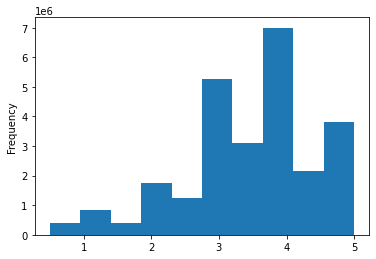

In [85]:
# Create a histogram to see if there are any glaring errors in the ratings
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()